In [1]:
from __future__ import annotations

import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from my_agents import REINFORCE
import gymnasium as gym

In [2]:
#  Genero env
env = gym.make("InvertedPendulum-v4")

# Salvo i dati di 50 episodi
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50) 

total_num_episodes = int(5e2) # Numero totale di episodi

# Dimensione spazio delle osservazioni e spazio delle azioni
obs_space_dims = env.observation_space.shape[0]
action_space_dims = env.action_space.shape[0]

# Init reward dei vari seeds
rewards_over_seeds = []

for seed in [1, 2, 3, 5, 8]:
    # Imposto lo stesso seed per i generatori di numeri casuali
    # in torch, random e numpy x avere ripetibilitá 
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

    # Init agente
    agent = REINFORCE(obs_space_dims, action_space_dims)

    # Init reward degli episodi nello stesso seed
    reward_over_episodes = []

    for episode in range(total_num_episodes):

        # Reset ambiente con il seed corrente
        obs, info = wrapped_env.reset(seed=seed)
        done = False

        while not done:
            # Campiono azione
            action = agent.sample_action(obs)

            # Eseguo azione
            obs, reward, terminated, truncated, info = wrapped_env.step(action)
            
            # Salvo la reward nella classe agent
            agent.rewards.append(reward)
            
            done = terminated or truncated

        # Salvo l'ultimo elemento di wrapped_env.return_queue, ovvero il ritorno totale dell'episodio piu recente
        reward_over_episodes.append(wrapped_env.return_queue[-1])

        # Update agente alla fine dell'episodio
        agent.update()

        # Ogni 1000 episodi mostro la reward media 
        if episode % 100 == 0:
            avg_reward = int(np.mean(wrapped_env.return_queue))
            print("Episode:", episode, "Average Reward:", avg_reward)

    # Finit gli episodi di un seed, salvo le reward in rewards_over_seeds
    rewards_over_seeds.append(reward_over_episodes)


Episode: 0 Average Reward: 8
Episode: 100 Average Reward: 12
Episode: 200 Average Reward: 13
Episode: 300 Average Reward: 14
Episode: 400 Average Reward: 15
Episode: 0 Average Reward: 17
Episode: 100 Average Reward: 12
Episode: 200 Average Reward: 10
Episode: 300 Average Reward: 13
Episode: 400 Average Reward: 13
Episode: 0 Average Reward: 12
Episode: 100 Average Reward: 9
Episode: 200 Average Reward: 9
Episode: 300 Average Reward: 11
Episode: 400 Average Reward: 11
Episode: 0 Average Reward: 13
Episode: 100 Average Reward: 9
Episode: 200 Average Reward: 10
Episode: 300 Average Reward: 11
Episode: 400 Average Reward: 11
Episode: 0 Average Reward: 12
Episode: 100 Average Reward: 9
Episode: 200 Average Reward: 10
Episode: 300 Average Reward: 9
Episode: 400 Average Reward: 9


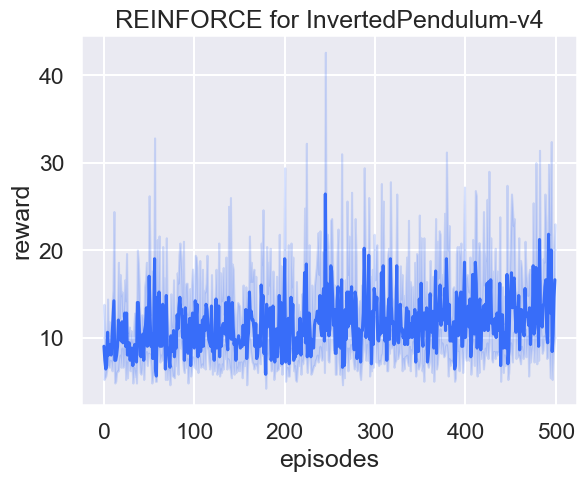

In [3]:
rewards_to_plot = [[reward[0] for reward in rewards] for rewards in rewards_over_seeds]
df1 = pd.DataFrame(rewards_to_plot).melt()
df1.rename(columns={"variable": "episodes", "value": "reward"}, inplace=True)
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", data=df1).set(
    title="REINFORCE for InvertedPendulum-v4"
)
plt.show()